# Working with data in Python

Notebook version:

1.0 (Sep 3, 2018) - First TMDE version

Authors: Vanessa Gómez Verdejo (vanessa@tsc.uc3m.es), Óscar García Hinde (oghinnde@tsc.uc3m.es), Simón Roca Sotelo (sroca@tsc.uc3m.es), Carlos Sevilla Salcedo (sevisal@tsc.uc3m.es)

Throughout this course we're going to work with data consisting of noisy signals, samples from probability distributions, etc. For example, we might need to apply different transformations to our data in order to compute a good predictor. 

In this notebook we will learn to use specific tools that will let us load, generate, transform and visualise data. We will expand on the mathematical tools that numpy offers and we will introduce a new library, matplotlib, that will allow us to plot all sorts of graphs from our data.

In [0]:
# Let's import some libraries
import numpy as np
import matplotlib.pyplot as plt

## 1. Data generation

One of the first things we need to learn is to generate random samples from a given distribution. Most things in life come muddled with random noise. A fundamental part of Detection and Estimation is finding out what the properties of this noise are in order to make better predictions. We assume that this noise can be modeled according to a specific probability distribution (i.e: nose generated by a Gaussian dastribution), which in turn allows us to make precise estimations of said distribution's parameters.

In python, random samples can be easily generated with the `numpy.random` package. Inside it we can find many usefull tools to sample from the most important probability distributions.

We have common number generator functions:
* `rand()`: uniformily generates random samples.
* `randn()`: returns samples from the “standard normal” distribution.

Or more specific ones:
* `exponential([scale, size])`: draw samples from an exponential distribution with a given scale parameter.
* `normal([loc, scale, size])`:	draw random samples from a normal (Gaussian) distribution with parameters: loc (mean) and scale (standard deviation).
* `uniform([low, high, size])`: draw samples from a uniform distribution in the range low-high.

In the following examples we will look at different random generation methods and we will visualize the results. For the time being, you can ignore the visualization code. Later on we will learn how these visualization tools work.

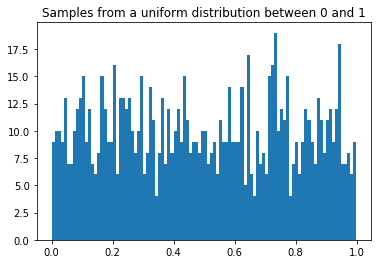

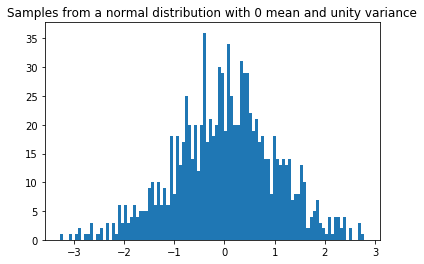

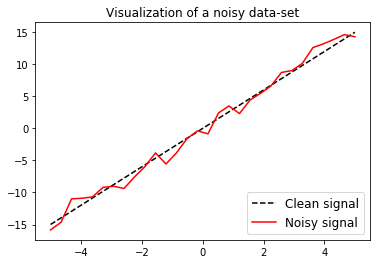

In [0]:
# Random samplig examples
n = 1000 # number of samples

# Sampling from a standard uniform distribution:
x_unif = np.random.rand(n)

fig1 = plt.figure()
plt.hist(x_unif, bins=100)
plt.title('Samples from a uniform distribution between 0 and 1')
plt.show()

# Sampling from a normal distribution:
x_norm = np.random.randn(n)

fig2 = plt.figure()
plt.hist(x_norm, bins=100)
plt.title('Samples from a normal distribution with 0 mean and unity variance')
plt.show()

# Adding Gaussian noise to a linear function:
n = 30
x = np.linspace(-5, 5, n)
noise = np.random.randn(n)
y = 3*x
y_noise = y + noise

fig3 = plt.figure()
plt.plot(x, y, color='black', linestyle='--', label='Clean signal')
plt.plot(x, y_noise, color='red', label='Noisy signal')
plt.legend(loc=4, fontsize='large')
plt.title('Visualization of a noisy data-set')
plt.show()

Note that the random vectors that are being generated will be different every time we execute the code. However, we often need to make sure we obtain the exact same sequence of random numbers in order to recreate specific experimental results. There are essentially two ways of doing this:

* Store the random sequence in variable and reuse it whenever the need arises. 
* Fix the seed of the random number generator with `numpy.random.seed(int)`. 

See for yourselves:

In [0]:
# Fixing the random number generator seed:

print("If we don't fix the seed, the sequence will be different each time:\n")
for i in range(3):
  print('Iteration ', str(i))
  print(np.random.rand(3), '\n')

print("\nHowever, if we fix the seed, we will always obtain the same sequence:\n")
for i in range(3):
  print('Iteration ', str(i))
  np.random.seed(0)
  print(np.random.rand(3), '\n')

If we don't fix the seed, the sequence will be different each time:

Iteration  0
[0.39962806 0.89065725 0.75685764] 

Iteration  1
[0.09702328 0.556011   0.16300424] 

Iteration  2
[0.56587942 0.57131782 0.29328582] 


However, if we fix the seed, we will always obtain the same sequence:

Iteration  0
[0.5488135  0.71518937 0.60276338] 

Iteration  1
[0.5488135  0.71518937 0.60276338] 

Iteration  2
[0.5488135  0.71518937 0.60276338] 



Now try to solve the following excersises:

Excersise 1:

Sample mean =  3.5362459247832723


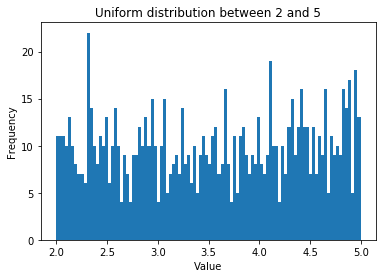

In [0]:
# 1. Generate 1000 samples from a uniform distribution that spans from 2 to 5.
# Print the sample mean and check that it approximates its expected value.
# Hint: check out the random.uniform() function

print('Excersise 1:\n')
n = 1000
x_unif = np.random.uniform(2, 5, n)
print('Sample mean = ', np.mean(x_unif))
plt.hist(x_unif, bins=100)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Uniform distribution between 2 and 5')
plt.show()


Excersise 2:

Sample mean =  2.9953805657457915
Sample variance =  2.0830088557522033


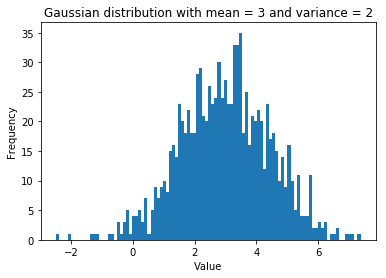

In [0]:
# 2. Generate 1000 samples from a Gaussian distribution with mean 3 and variance 2.
# Print the sample mean and variance and check that they approximate their 
# expected values.
# Hint: check out the random.normal() function. Also, think about the changes you 
# need to apply to a standard normal distribution to modify its mean and variande 
# and try to obtain the same results using the random.randn() function.

print('\nExcersise 2:\n')
n = 1000
#x_gauss = np.random.normal(3, np.sqrt(2), n) #Standard Deviation = sqrt(Variance)
x_gauss_std = np.random.randn(n)
x_gauss = x_gauss_std*np.sqrt(2)+3 # z = X-mean/std_deviation -> X = z*std_deviation + mean
print('Sample mean = ', np.mean(x_gauss))
print('Sample variance = ', np.var(x_gauss))
plt.hist(x_gauss, bins=100)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Gaussian distribution with mean = 3 and variance = 2')
plt.show()


Excersise 3:



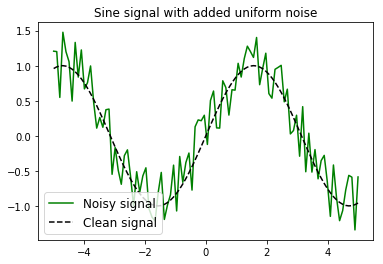

In [0]:
# 3. Generate 100 samples of a sine signal between -5 and 5 and add uniform 
# noise with mean 0 and amplitude 1.

print('\nExcersise 3:\n')
n = 100
x = np.linspace(-5, 5, n)
y = np.sin(x)
noise = np.random.uniform(-0.5, 0.5, n)
y_noise = y + noise
plt.plot(x, y_noise, color='green', label='Noisy signal')
plt.plot(x, y, color='black', linestyle='--', label='Clean signal')
plt.legend(loc=3, fontsize='large')
plt.title('Sine signal with added uniform noise')
plt.show()


Excersise 4:



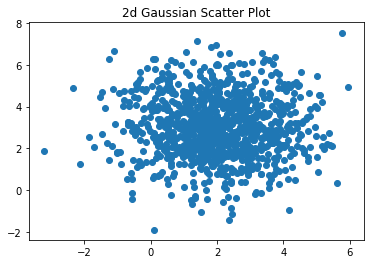

In [0]:
# 4. Generate 1000 samples from a 2 dimensional Gaussian distribution with mean 
# [2, 3] and covariance matrix [[2, 0], [0, 2]].
# Hint: check out the random.multivariate_normal() function.

print('\nExcersise 4:\n')
n = 1000
mean = [2, 3]
cov = [[2, 0], [0, 2]]
x_2d_gauss = np.random.multivariate_normal(mean, cov, n)
plt.scatter(x_2d_gauss[:, 0], x_2d_gauss[:, 1], )
plt.title('2d Gaussian Scatter Plot')
plt.show()

## 2. Data representation: Matplotlib

When we work with real data, or even if we generate data following a certain function or random distribution, we often acquire a better understanding by plotting the content of a vector, instead of just looking at a bunch of real numbers. In a plot, we assign each axis a meaning (e.g., y-axis could be a probability, kilograms, euros, etc; and x-axis could be time, index of samples, etc.). It should be clear by now how important data visualization is for us and the people who receive our data. Data analysis wouldn't be Data analysis without a nice visualization.  

In Python the simplest plotting library is _matplotlib_ and its sintax is similar to Matlab plotting library. As in Matlab, we can plot any set of samples making use of a lot of features. For instance, we can model the sampling of a continuous signal, we can deal with discrete samples of a signal, or we can even plot the histogram of random samples. 


Take a look at the following code we use to plot two different sinusoids:

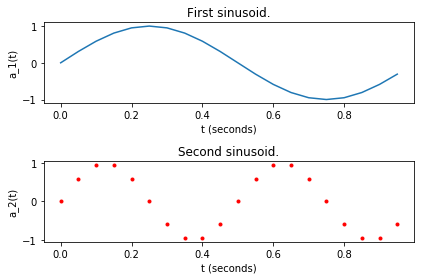

In [0]:
t = np.arange(0.0, 1.0, 0.05) # Time vector, from 0s to 1s in steps of 0.05s.
a1 = np.sin(2*np.pi*t) # Samples of the first signal.
a2 = np.sin(4*np.pi*t) # Samples of the second signal.

# Visualization

# We can create a figure that will contain our plots.
plt.figure()
# We can plot the two signals in different subplots, as in Matlab.

# First signal
ax1 = plt.subplot(211)
ax1.plot(t,a1)
plt.title('First sinusoid.')
plt.xlabel('t (seconds)')
plt.ylabel('a_1(t)')

# Second signal
ax2 = plt.subplot(212)
ax2.plot(t,a2, 'r.')
plt.title('Second sinusoid.')
plt.xlabel('t (seconds)')
plt.ylabel('a_2(t)')

# We ensure the two plots won't overlap, and finally we show the results on the 
# screen.
plt.tight_layout()
plt.show()

Let's analyse how we have created the previous figures and in which things they differ:



*   A crucial aspect to consider is that **both curves represent a set of discrete samples** (the samples we've generated). While the second plot uses red dots to represent the data (specified through `'r.'`), the first one will draw the points using the standard blue line. As in Matlab, using lines to plot samples will interpolate them by default. If we don't want Matplotlib to do so, we can specify a different symbol, like dots, squares, etc...
*   We can label the axis and set titles, enhancing the way in which our data is presented. Moreover, we can improve the clarity of a figure by including or modyfing the line width, colours, symbols, legends, and a big etcetera. 

Look at the following figure and try to catch which argument and/or piece of code is related with each feature. It's intuitive! You can modify the parameters and see what's the new outcome. 





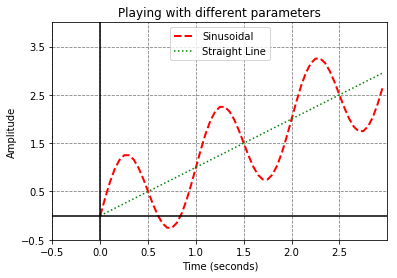

In [0]:
t = np.arange(0.0, 3, 0.05)
a1 = np.sin(2*np.pi*t)+t 
a2 = np.ones(a1.shape)*t

plt.figure()
# We are going to plot two signals in the same figure. For each one we can
# specify colors, symbols, width, and the label to be displayed in a legend.
# Use the Matplotlib docs if you want to know all the things you can do. 
plt.plot(t,a1,'r--',LineWidth=2, label='Sinusoidal') 
plt.plot(t,a2, 'g:', label='Straight Line')


plt.title('Playing with different parameters')
plt.ylabel('Amplitude')
plt.xlabel('Time (seconds)')

# By default, axis limits will coincide with the highest/lowest values in our 
# vectors. However, we can specify ranges for x and y.
plt.xlim((-0.5, 3))
plt.ylim((-0.5, 4))

# When plotting more than one curve in a single figure, having a legend is a 
# good practice. You can ask Matplotlib to place it in the "best" position
# (trying not to overlap the lines), or you can specify positions like
# "upper left", "lower right"... check the docs!
plt.legend(loc='best')

# We can draw the origin lines, to separate the bidimensional space in four 
# quadrants.
plt.axhline(0,color='black')
plt.axvline(0, color='black')

# We can also set a grid with different styles... 
plt.grid(color='grey', linestyle='--', linewidth=0.8)

# And specify the "ticks", i.e., the values which are going to be specified in 
# the axis, where the grid method is placing lines. 
plt.xticks(np.arange(-0.5, 3, 0.5)) # In x, put a value each 0.5.
plt.yticks(np.arange(-0.5, 4, 1)) # In y, put a value each 1. 

# Finally, plot all the previous elements. 
plt.show()


In just a single example we have seen a lot of Matplotlib functionalities that can be easely tuned. You have all you need to draw decent figures. However, those of you who want to learn more about Matplotlib can take a look at [AnatomyOfMatplotlib](https://github.com/matplotlib/AnatomyOfMatplotlib), a collection of notebooks in which you will explore more in depth Matplotlib. 

Now, try to solve the following exercises:

In [0]:
# 1. Generate a random vector x, taking 200 samples of a uniform distribution, defined in the
# [-2,2] interval.

n = 200
x = np.random.uniform(-2,2,n)

# 2. Create a weights vector w, in which w[0] = 2.4, w[1] = -0.8 and w[2] = 1.
w = np.array([2.4, -0.8, 1])

print('x shape:\n',x.shape)
print('\nw:\n', w)
print('w shape:\n', w.shape)



x shape:
 (200,)

w:
 [ 2.4 -0.8  1. ]
w shape:
 (3,)


In [0]:
# 2. Obtain the vector y whose samples are obtained by the polynomial 
# w_2*x^2 + w_1*x + w_0.

y = w[2]*x**2 + w[1]*x + w[0]

print('y shape:\n',y.shape)


y shape:
 (200,)


In [0]:
# 3. You probably obtained the previous vector as a sum of different terms.
# If so, try to obtain y again (and name it y2) as a product of a matrix X and 
#a vector w. Then, check that both methods lead to the same result (be careful
# with shapes).

# (hint: w will remain the same, but now X has to be constructed in a way that 
# the dot product of X and w is consistent).


X = np.array([np.ones((len(x),)), x, x**2]).T
y2 = np.dot(w,X)
#print('y: \n', y)
#print('y2: \n', y2)
print('y shape:\n',y.shape)
print('y2 shape:\n',y2.shape)

if(np.array_equal(y,y2)):
  print('\ny and y2 are the same, well done!')
else:
  print('\nOops, something went wrong, try again!')



<class 'numpy.float64'>
<class 'numpy.float64'>
y shape:
 (200,)
y2 shape:
 (200,)

Oops, something went wrong, try again!


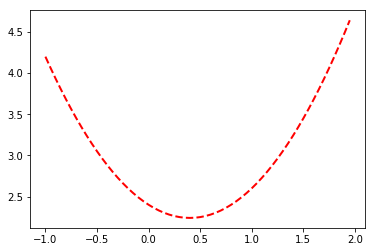

In [0]:
# 4. Define x2 as a range vector, going from -1 to 2, in steps of 0.05. Then, 
# obtain y3 as w_2*x2^2 + w_1*x2 + w_0 and plot the result using a red dashed line
# (--).

x2 = np.arange(-1,2,0.05)
y3 = w[2]*x2**2+w[1]*x2+w[0]
fig1 = plt.figure()
plt.plot(x2,y3,'r--',LineWidth=2)
plt.show()

In the above exercises you have plotted a few vectors which are deterministic, that is, a range or a function applied to a range. 

Let's now consider the case of representing random samples and distributions. 

If we have an expression to obtain the density of a given distribution, we can plot it in the same way we plotted functions before. 

In a more general case, when we only have access to a limited number of samples, or we are interested in sampling them randomly, we usually make use of a histogram. 

Consider `x` a vector containing samples coming from a 1-dimensional random variable. A histogram is a figure in which we represent the observed frequencies of different ranges of the `x` domain. We can express them as relative frequencies (summing up to 1) or absolute frequencies (counting events). 

We can adapt the number and size of intervals (called bins) to directly affect the resolution of the plot. 

When we have a sufficiently high number of random samples coming from the same distribution, its histogram is expected to have a similar shape to the theoretical expression corresponding to the density of this distribution. 

In Matplotlib, we have already plotted histograms, with `plt.hist(samples,bins=)`.

Let's see some examples:

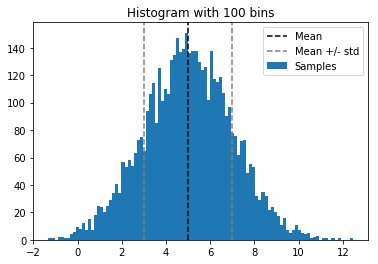

Sample mean =  5.008906951339965
Sample variance =  3.9384306750980635


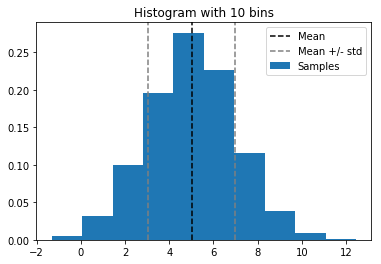

Sample mean =  5.008906951339965
Sample variance =  3.9384306750980635


In [0]:
# We take samples from a normalized gaussian distribution, and we change
# mean and variance with an operation.
sigma = 4
mn = 5
x_norm = mn + np.sqrt(sigma)*np.random.randn(5000)

# Let's obtain an histogram with high resultion, that is, a lot of bins.
fig1 = plt.figure()
plt.hist(x_norm, bins=100,label='Samples')
plt.title('Histogram with 100 bins')

# With vertical lines, we plot the mean and the intervals obtain summing one 
# standard deviation to the mean. 
plt.axvline(x=np.mean(x_norm),color='k',linestyle='--',label='Mean')
plt.axvline(x=np.mean(x_norm)+np.std(x_norm),color='grey',linestyle='--',label='Mean +/- std')
plt.axvline(x=np.mean(x_norm)-np.std(x_norm),color='grey',linestyle='--')


plt.legend(loc='best')
plt.show()

# We check that the mean and variance of the samples is aprox. the original one.
print('Sample mean = ', x_norm.mean())
print('Sample variance = ', x_norm.var())

# Now let's plot a low resolution histogram, with just a few bins.
fig2 = plt.figure()

# We can set weights in this way to obtain a normalized histogram, i.e.,
# expressing relative frequencies. 
w_n = np.zeros_like(x_norm) + 1. / x_norm.size

plt.hist(x_norm, bins=10,label='Samples',weights=w_n)
plt.title('Histogram with 10 bins')
plt.axvline(x=np.mean(x_norm),color='k',linestyle='--',label='Mean')
plt.axvline(x=np.mean(x_norm)+np.std(x_norm),color='grey',linestyle='--',label='Mean +/- std')
plt.axvline(x=np.mean(x_norm)-np.std(x_norm),color='grey',linestyle='--')
plt.legend(loc='best')
plt.show()

# A different resolution leads to different representations, but don't forget
# that we are plotting the same samples.

print('Sample mean = ', x_norm.mean())
print('Sample variance = ', x_norm.var())


Now it's your turn!

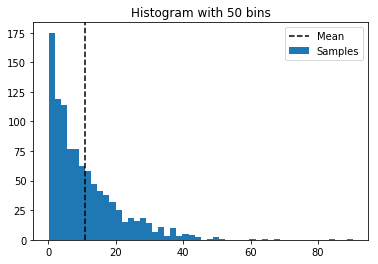

Sample mean:  10.746854030582437


In [0]:
# 1. Obtain x_exp as 1000 samples of an exponential distribution with scale 
# parameter of 10. 

n = 1000
x_exp = np.random.exponential(10, n)

# 2. Plot the corresponding histogram for the previous set of samples, using
# 50 bins. Obtain the empirical mean and make it appear in the histogram legend.
# Does it coincide with the theoretical one?

plt.hist(x_exp, bins=50, label='Samples')
plt.title('Histogram with 50 bins')
plt.axvline(x=np.mean(x_exp),color='k',linestyle='--',label='Mean')
plt.legend(loc='best')
plt.show()

print('Sample mean: ', np.mean(x_exp))

Taking into account that the exponential density can be expressed as:

$f(x;\beta) = \frac{1}{\beta} e^{-\frac{x}{\beta}}; x>=0$.

where $\beta$ is the scale factor. 



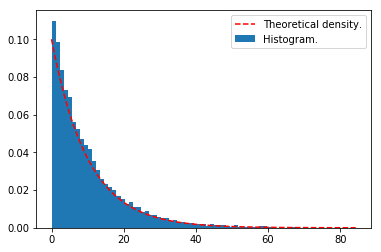

In [0]:
# 3. Fill the variable density using the vector x and apply it the theoretical
# density for an exponential distribution. Then, take a look at the plot. Do the
# histogram and the density look alike? How does the number of samples affect 
# the final result?

np.random.seed(4) # Keep the same result
x_exp = np.random.exponential(10,10000) # exponential samples
x = np.arange(np.min(x_exp),np.max(x_exp),0.05)
density = (1/10)*np.exp(-x/10)


w_n = np.zeros_like(x_exp) + 1. / x_exp.size
plt.hist(x_exp, weights=w_n,label='Histogram.',bins=75)
plt.plot(x,density,'r--',label='Theoretical density.')
plt.legend()
plt.show()

## 3. Data storage: Saving and loading files

Once we have learned to generate and plot data, the next thing we need to know is how we can store those results for future usage and, subsequently, how to load them. 

Python is a programming language commonly used in the context of data analysis. This implies there is a vast number of libraries and functions to work with data. In our case, we will study how to save your data into `mat` or `csv` files, although there are some other methods we encourage you to take a look at ([`pickle`](https://docs.python.org/3/library/pickle.html),  [`pandas`](https://towardsdatascience.com/a-quick-introduction-to-the-pandas-python-library-f1b678f34673), [`npz`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.savez.html),...).

### 3.1. Dictionaries


All of these are most usually combined with dictionaries. Dictionaries are an useful data structure implemented in Python which allows to index its different elements with keys instead of with a range of numbers. This way you can access the different elements on the list using either a number or a string.

In [0]:
# Creating a dictionary with different keys. These keys can be either an 
# integer or a string. To separate elements you have to use ','.

my_dict = {'Is she a witch?': 'If... she... weights the same as a duck... she`s made of wood!', 42: 'Can you repeat the question?'}
print (my_dict)

{'Is she a witch?': 'If... she... weights the same as a duck... she`s made of wood!', 42: 'Can you repeat the question?'}


It works in a similar way to lists, being capable of storing arrays, numbers and strings of diferent sizes. In the case of dictionaries, to access to a certain value you just have to use its key.

In [0]:
# We can add a new key to a dictionary and fill in its value.
# Let's add a list of things that float in water:

my_dict['What floats in water?'] = ['Bread','Apples','Very small rocks','Cider','Gravy','Cherries','Mud']

# Now we can access to the key of things that float in water and add some other
# elements to the array in the dictionary:

my_dict['What floats in water?'].append('A duck')
print (my_dict['What floats in water?'])

# Print line by line the keys and elements on the dictionary 
print('\nThese are the keys and elements on my list:\n')
for key in my_dict:
    print (key,':',my_dict[key])

['Bread', 'Apples', 'Very small rocks', 'Cider', 'Gravy', 'Cherries', 'Mud', 'A duck']

These are the keys and elements on my list:

Is she a witch? : If... she... weights the same as a duck... she`s made of wood!
42 : Can you repeat the question?
What floats in water? : ['Bread', 'Apples', 'Very small rocks', 'Cider', 'Gravy', 'Cherries', 'Mud', 'A duck']


Let's now try to apply this knowledge about dictionaries with the following exercise:

In [0]:
# 1. Create a dictionary with your name and a colleage's and create a 
# dictionary for each of you with what you are wearing. Then print the whole
# list to see what are each of you wearing.

alumnos = {'Mari' : ['Camisa', 'Básica', 'Vaqueros', 'Samba'], }
alumnos['María'] = ['Jersey', 'Collar', 'Jersey', 'Vaqueros', 'Converse']
clothes = ['Shirt','Dress','Glasses','Shoes']

for alumno in alumnos:
  print(alumno, ':', alumnos[alumno])

Mari : ['Camisa', 'Básica', 'Vaqueros', 'Samba']
María : ['Jersey', 'Collar', 'Jersey', 'Vaqueros', 'Converse']


### 3.2. Saving and Loading

Now that we know how to create and work with dictionaries we can start to save these dictionaries into different file types. In order to work with `.mat` files, we need to work with the `scipy.io` library, which provides us with the functions we need:
*  `scipy.io.savemat([filename,mdict])`: stores the given dictionary in a `mat` file with the given file name.

* `scipy.io.loadmat([filename, mdict=None])`: loads the `mat` file with the given file name. If a dictionary is given, it loads the data into it.

In [0]:
# Saving the previous dictionary in a mat file:

import scipy.io as sio
sio.savemat('dictionaries_rule.mat', alumnos)

In [0]:
# Load the previously stored mat file:

data = sio.loadmat('dictionaries_rule.mat')
print (data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'Mari', 'María'])


The `csv` (Comma Separated Values) files are one of the most common when working with databases. As stated in its name, these format defines the sepparation between elements in the file by a delimiter, typically the comma. Nevertheless, as this files can be defined using any delimiter, it is recommendable to specify which one you would like to use to avoid errors.

In particular, we are going to work with the functions which  allow us to save and load data:

* `csv.writer([filename, delimiter])`:  creates the `csv` file with the specified filename.
* `csv.reader([filename, delimiter])`:  loads the `csv` file with the specified filename.


In [0]:
# Saving a csv file with some text in it separated by spaces:

import csv
with open('eggs.csv', 'w') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=' ')
    spamwriter.writerow(['Spam'] * 5 + ['Baked Beans'])
    spamwriter.writerow(['Spam', 'Lovely Spam', 'Wonderful Spam'])

In [0]:
# Loading the csv file and join the elements with commas instead of spaces:

with open('eggs.csv', 'r') as csvfile:
  spamreader = csv.reader(csvfile, delimiter=' ')
  for row in spamreader:
    print (', '.join(row))

Spam, Spam, Spam, Spam, Spam, Baked Beans
Spam, Lovely Spam, Wonderful Spam


### 3.3. Storing with Google Colaboratory

Finally, we will see how to work with stored data in Google Colaboratory. First of all, to work with some data you have on your computer you have to upload it first to Google Colab. At the same time, after storing some data on a notebook, you have to download it into your computer before the sesssion execution time runs out or else you would lose it.

To do so, you have to access the menu on your left and go to the tab `Files(Archivos)`:

![](http://www.tsc.uc3m.es/~sevisal/GoogleColab_Files.png)

Once there there is press the button `Upload(Subir)` to temporarily upload the files to Google Colab:

![](http://www.tsc.uc3m.es/~sevisal/GoogleColab_Upload.png)

If you want to download some of the files you have saved, just right click on the file you are interested in and click `Download(Descargar)`:

![](http://www.tsc.uc3m.es/~sevisal/GoogleColab_Download.png)
